In [2]:
# Import and configuration
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import os
import pandas as pd

from config import *

In [3]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path, 
                            encoding="iso-8859-1", low_memory=False)
census_data = pd.read_csv(census_data_path, 
                          encoding="iso-8859-1", low_memory=False)

 

In [42]:
census_data.head()
census_data = census_data.rename(columns={"State":"State Name"})
census_data.head()

,State Name,2013,2014,2015,2016,2017
0,Alabama,4833722,4849377,4858979,4863300,4874747
1,Alaska,735132,736732,738432,741894,739795
2,Arizona,6626624,6731484,6828065,6931071,7016270
3,Arkansas,2959373,2966369,2978204,2988248,3004279
4,California,38332521,38802500,39144818,39250017,39536653


In [43]:
# Your code for geography-related analysis starts here
clean_incident_data = incident_data.loc[:,['Year','State Name',
                                        'Number of Killed',
                                        'Number of Injured'    
]]
clean_incident_data.head(5)

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [44]:
#create group based on values in the year column
killed_data = clean_incident_data["Number of Killed"].value_counts()
injured_data = clean_incident_data["Number of Injured"].value_counts()

grouped_year_df = clean_incident_data.groupby('Year')

count_years = grouped_year_df['Year'].count()
count_years

Year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: Year, dtype: int64

In [45]:
reduced_incident_pd = incident_data.iloc[:, [
    0, 1, 2, 3]]

del reduced_incident_pd['Number of Killed']
del reduced_incident_pd['Number of Injured']
reduced_incident_pd 

,Year,State Name
0,2013,Pennsylvania
1,2013,California
2,2013,Ohio
3,2013,Colorado
4,2013,North Carolina
5,2013,Oklahoma
6,2013,New Mexico
7,2013,Louisiana
8,2013,California
9,2013,Maryland


In [80]:
years = reduced_incident_pd.Year.unique()
years

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [102]:
counts = reduced_incident_pd.groupby(['Year']).count()
counts
counts = pd.DataFrame(counts)

counts = counts.rename(columns={'State Name':'Total Incidents'})
counts.head()

totals = counts.sum(level=0)
counts

,Total Incidents
Year,
2013,278
2014,51854
2015,53579
2016,58763
2017,61401
2018,13802


In [ ]:
plt.bar(ages, counts['M'], bottom=None, color='blue', label='M')
plt.bar(ages, counts['F'], bottom=counts['M'], color='pink', label='F')
plt.legend()
plt.xlabel('Ages')
plt.ylabel('Count')

for age,tot in zip(ages,totals.values.flatten()):
    plt.annotate('N={:d}'.format(tot), xy=(age+0.4, tot), xytext=(0,5), textcoords='offset points', ha='center', va='bottom')

In [97]:
year_counts = clean_incident_data["Year"].value_counts()
year_counts = year_counts.head()
year_counts = pd.DataFrame(year_counts)
year_counts = year_counts.reset_index()
year_counts = year_counts.rename(columns={'index':'Year', 'Year': 'Total Incidents'})
year_counts.head()
year_counts

year_counts = year_counts.sort_values("Year")
year_counts.head(5)

,Year,Total Incidents
3,2014,51854
2,2015,53579
1,2016,58763
0,2017,61401
4,2018,13802


<IPython.core.display.Javascript object>


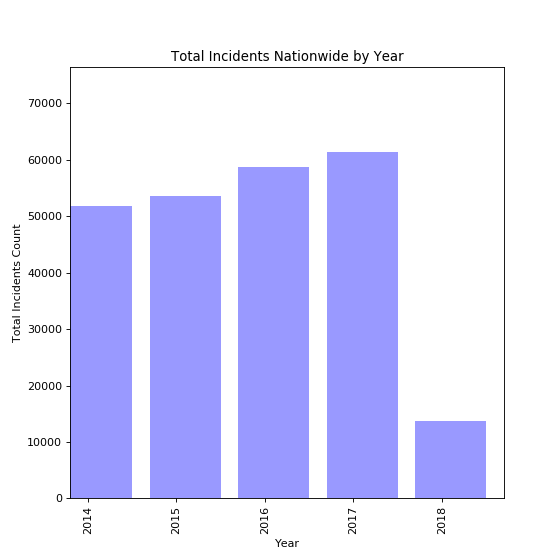

NameError: name 'xrange' is not defined

In [110]:
plt.figure(figsize=(7,7))
plt.bar(x_axis, year_counts["Total Incidents"], color='b', alpha=0.4, align="edge")
plt.xticks(tick_locations, year_counts["Year"], rotation="vertical")

plt.xlim(0.10000, len(x_axis))
plt.ylim(0, max(year_counts["Total Incidents"])+15000)

plt.title("Total Incidents Nationwide by Year")
plt.xlabel("Year")
plt.ylabel("Total Incidents Count")


 

In [304]:
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


In [377]:
incident_data.columns

Index(['Year', 'State Name', 'Number of Killed', 'Number of Injured',
       'Incident Info', 'Latitude', 'Longitude', 'Participant Age',
       'Participant Age Group', 'Participant Gender',
       'Participant Relationship', 'Participant Status', 'Participant Type',
       'State Abbr'],
      dtype='object')

In [427]:
reduced_incident_pd = incident_data.iloc[:, [
    0, 1, 2, 3]]
reduced_incident_pd.head()

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [438]:
reduced_incident_pd["Total Incidents"] = reduced_incident_pd["Number of Killed"] + reduced_incident_pd["Number of Injured"] 
 


C:\Users\wgdav\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [449]:
# Create DataFrame total incident by year 2013
group_2013 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2013]
group_2013.head()
del group_2013['Number of Killed']
del group_2013['Number of Injured']
group_2013.head()



state_incidents = group_state_2013["Total Incidents"].sum()
state_incidents.head()



AttributeError: 'numpy.int64' object has no attribute 'head'

In [68]:
state_counts = group_2013["State Name"].value_counts()
 


NameError: name 'group_2013' is not defined

In [448]:
group_2014 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2014]
group_2014.head()
del group_2014['Number of Killed']
del group_2014['Number of Injured']
group_2014.head()

state_counts = group_2014["State Name"].value_counts()
state_counts 
group_state_2014 = group_2014.groupby(['State Name'])
group_state_2014.head()

state_incidents = group_state_2014["Total Incidents"].count()
state_incidents.head()

state_summary_2014 = pd.DataFrame({"Total Incident 2014": state_incidents})
state_summary_2014.head()

,Total Incident 2014
State Name,
Alabama,1318
Alaska,146
Arizona,556
Arkansas,572
California,3732


In [435]:
group_2015 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2015]
group_2015.head()
del group_2015['Number of Killed']
del group_2015['Number of Injured']
group_2015.head()

state_counts = group_2015["State Name"].value_counts()
state_counts 
group_state_2015 = group_2015.groupby(['State Name'])
group_state_2015.head()

state_incidents = group_state_2015["Total Incidents"].sum()
state_incidents.head()

state_summary_2015 = pd.DataFrame({"Total Incident 2015": state_incidents})
state_summary_2015.head()

,Total Incident 2015
State Name,
Alabama,947
Alaska,154
Arizona,408
Arkansas,400
California,2821


In [436]:
group_2016 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2016]
group_2016.head()
del group_2016['Number of Killed']
del group_2016['Number of Injured']
group_2016.head()


state_counts = group_2016["State Name"].value_counts()
state_counts 
group_state_2016 = group_2016.groupby(['State Name'])
group_state_2016.head()

state_incidents = group_state_2016["Total Incidents"].sum()
state_incidents.head()

state_summary_2016 = pd.DataFrame({"Total Incident 2016": state_incidents})
state_summary_2016.head()

,Total Incident 2016
State Name,
Alabama,1249
Alaska,191
Arizona,571
Arkansas,541
California,3161


In [437]:
group_2017 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2017]
group_2017.head()
del group_2017['Number of Killed']
del group_2017['Number of Injured']
group_2017.head()


state_counts = group_2017["State Name"].value_counts()
state_counts 
group_state_2017 = group_2017.groupby(['State Name'])
group_state_2017.head()

state_incidents = group_state_2017["Total Incidents"].sum()
state_incidents.head()

state_summary_2017 = pd.DataFrame({"Total Incident 2017": state_incidents})
state_summary_2017.head()

,Total Incident 2017
State Name,
Alabama,1400
Alaska,139
Arizona,587
Arkansas,653
California,3376


In [452]:
combined_state_year = pd.merge(state_summary_2013, state_summary_2014, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2015, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2016, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2017, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , census_data, how='outer', on='State Name')
combined_state_year = combined_state_year.rename(columns={"2013":"Population 2013","2014":"Population 2014","2015":"Population 2015", "2016":"Population 2016", "2017": "Population 2017"})
combined_state_year.fillna(0, inplace=True)
combined_state_year.head(54)

,State Name,Total Incident 2013,Total Incident 2014,Total Incident 2015,Total Incident 2016,Total Incident 2017,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017
0,Alabama,12.0,1318.0,947.0,1249.0,1400.0,4833722,4849377,4858979,4863300,4874747
1,Arizona,24.0,556.0,408.0,571.0,587.0,6626624,6731484,6828065,6931071,7016270
2,California,185.0,3732.0,2821.0,3161.0,3376.0,38332521,38802500,39144818,39250017,39536653
3,Colorado,13.0,556.0,458.0,506.0,499.0,5268367,5355866,5456574,5540545,5607154
4,Connecticut,15.0,583.0,421.0,426.0,382.0,3596080,3596677,3590886,3576452,3588184
5,Delaware,13.0,493.0,264.0,229.0,297.0,925749,935614,945934,952065,961939
6,District of Columbia,44.0,838.0,469.0,445.0,440.0,646449,658893,672228,681170,693972
7,Florida,58.0,3138.0,2343.0,2847.0,2751.0,19552860,19893297,20271272,20612439,20984400
8,Georgia,31.0,2032.0,1691.0,1405.0,1715.0,9992167,10097343,10214860,10310371,10429379
9,Illinois,92.0,3095.0,3510.0,5083.0,4588.0,12882135,12880580,12859995,12801539,12802023


In [458]:
combined_state_year.to_csv("../Output/Incident_State_year.csv", index=True, header=True)

In [307]:
#sum incidents
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214
